# Heart Disease Classification


**Key columns in this dataset include:**

`sex:` The gender of the patient, which can be "male" or "female."

`age:` The age of the patient at the time of evaluation.

`cp (Chest Pain Type):` Indicates the type of chest pain, which may provide insight into the patient's cardiac status.

`resting_BP (Resting Blood Pressure):` The resting blood pressure of the patient (in mm Hg).

`chol (Cholesterol):` The cholesterol level of the patient (in mg/dL).

`fbs (Fasting Blood Sugar):` Fasting blood sugar level, indicating whether it is above 120 mg/dL.

`restecg (Resting ECG Results):` Resting electrocardiographic results, categorized as 0, 1, or 2 .

`thalach (Maximum Heart Rate Achieved):` The highest heart rate achieved during the test.

`exang (Exercise Induced Angina):` Indicates the presence or absence of exercise-induced chest pain.

`oldpeak:` ST depression induced by exercise relative to rest.

`slope (Slope of the Peak Exercise ST Segment):` The slope of the ST segment during peak exercise (0, 1, or 2).

`ca (Number of Major Vessels Colored):` Number of major vessels (0-3) colored by fluoroscopy.

`thal (Thalassemia):` Thalassemia type (1: normal, 2: fixed defect, 3: reversible defect).

`Max Heart Rate Reserve:` The difference between the calculated maximum heart rate and the recorded heart rate, indicating the remaining heart rate reserve.

`Heart Disease Risk Score:` A score indicating the likelihood of the patient developing heart disease, calculated based on factors such as age, cholesterol levels, blood pressure, and other characteristics.

`target:` Indicates whether the patient has heart disease (0: No heart disease, 1: Heart disease present).

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Data Loading and Overview


In [ ]:
heart = pd.read_csv('/content/heartv1.csv')

In [ ]:
print(heart.info)

<bound method DataFrame.info of          sex  age  cp  resting_BP  chol  fbs  restecg  thalach   exang  \
0       male   65   0         130   254    0        0       147      0   
1       male   53   0         140   261    0        0       186      1   
2       male   50   0         122   222    0        0       186      0   
3     female   47   1         112   160    0        1       138      0   
4       male   47   0         142   309    0        0       147      1   
...      ...  ...  ..         ...   ...  ...      ...       ...    ...   
1030  female   45   2         145   195    0        1       180      1   
1031    male   53   0         125   210    0        1       165      0   
1032  female   60   1         130   240    1        0       150      1   
1033    male   67   2         155   205    0        1       140      0   
1034  female   59   0         110   175    0        1       172      1   

      oldpeak  slope  ca  thal  Max Heart Rate Reserve  \
0         1.4      1 

In [ ]:
heart.head()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


## Exploratory Data Analysis and Data Visualization


In [ ]:
heart.describe()

,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,56.447343,0.944928,131.663768,245.608696,0.150725,0.531401,149.182609,0.338164,1.078937,1.381643,0.760386,2.321739,16.339130,11.873952,0.513043
std,9.098955,1.029479,17.503716,51.532478,0.357953,0.527511,22.952151,0.473313,1.174529,0.620609,1.033564,0.621862,21.140178,2.235081,0.500071
min,28.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,7.540000,0.000000
25%,50.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10.160000,0.000000
50%,58.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,12.000000,11.690000,1.000000
75%,63.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,28.000000,13.560000,1.000000
max,79.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,82.000000,18.800000,1.000000


In [ ]:
heart.isnull().sum()

,0
sex,0
age,0
cp,0
resting_BP,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart['target'].value_counts()

,count
target,
1,531
0,504


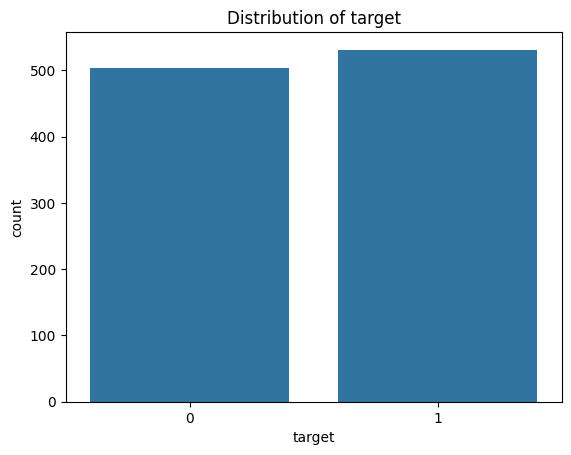

In [ ]:
sns.countplot(x='target', data=heart)
plt.title('Distribution of target')
plt.show()

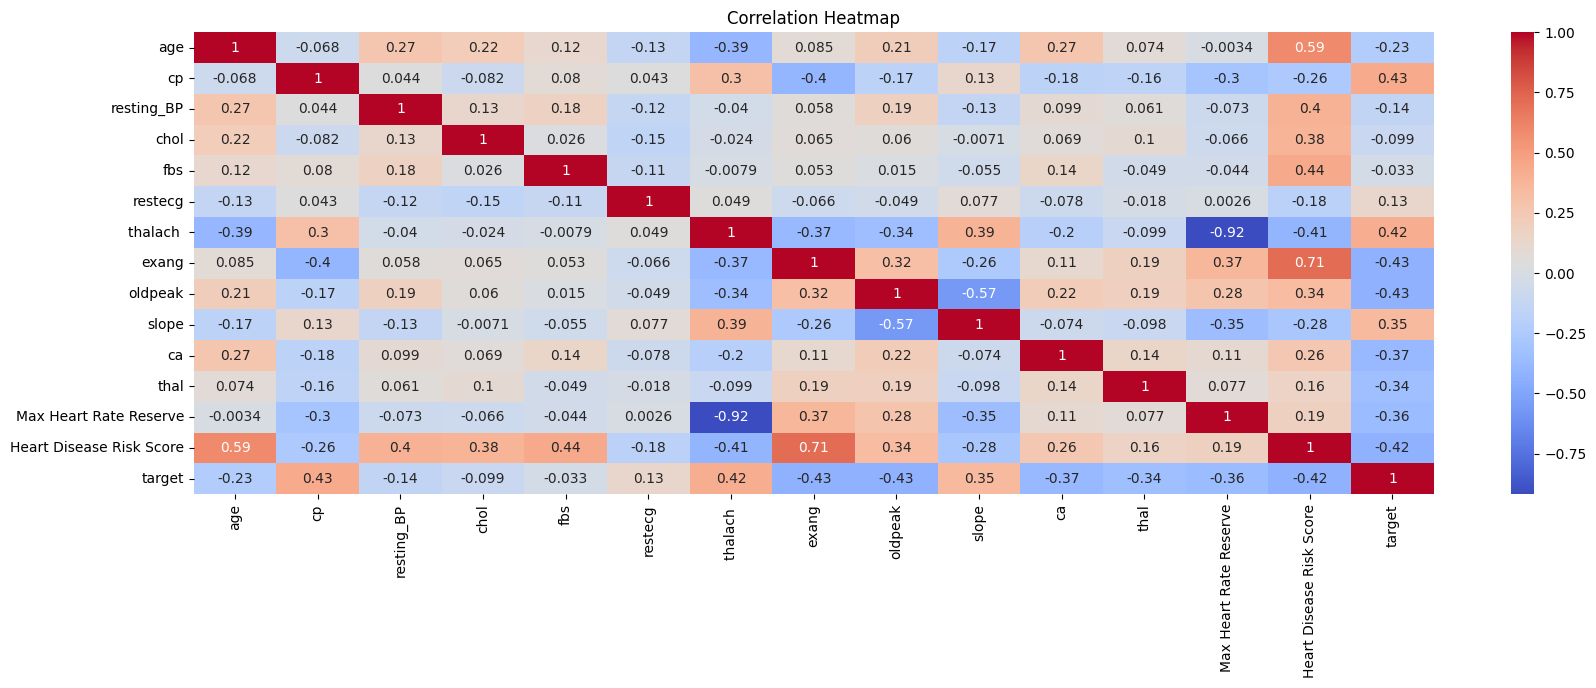

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(heart.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

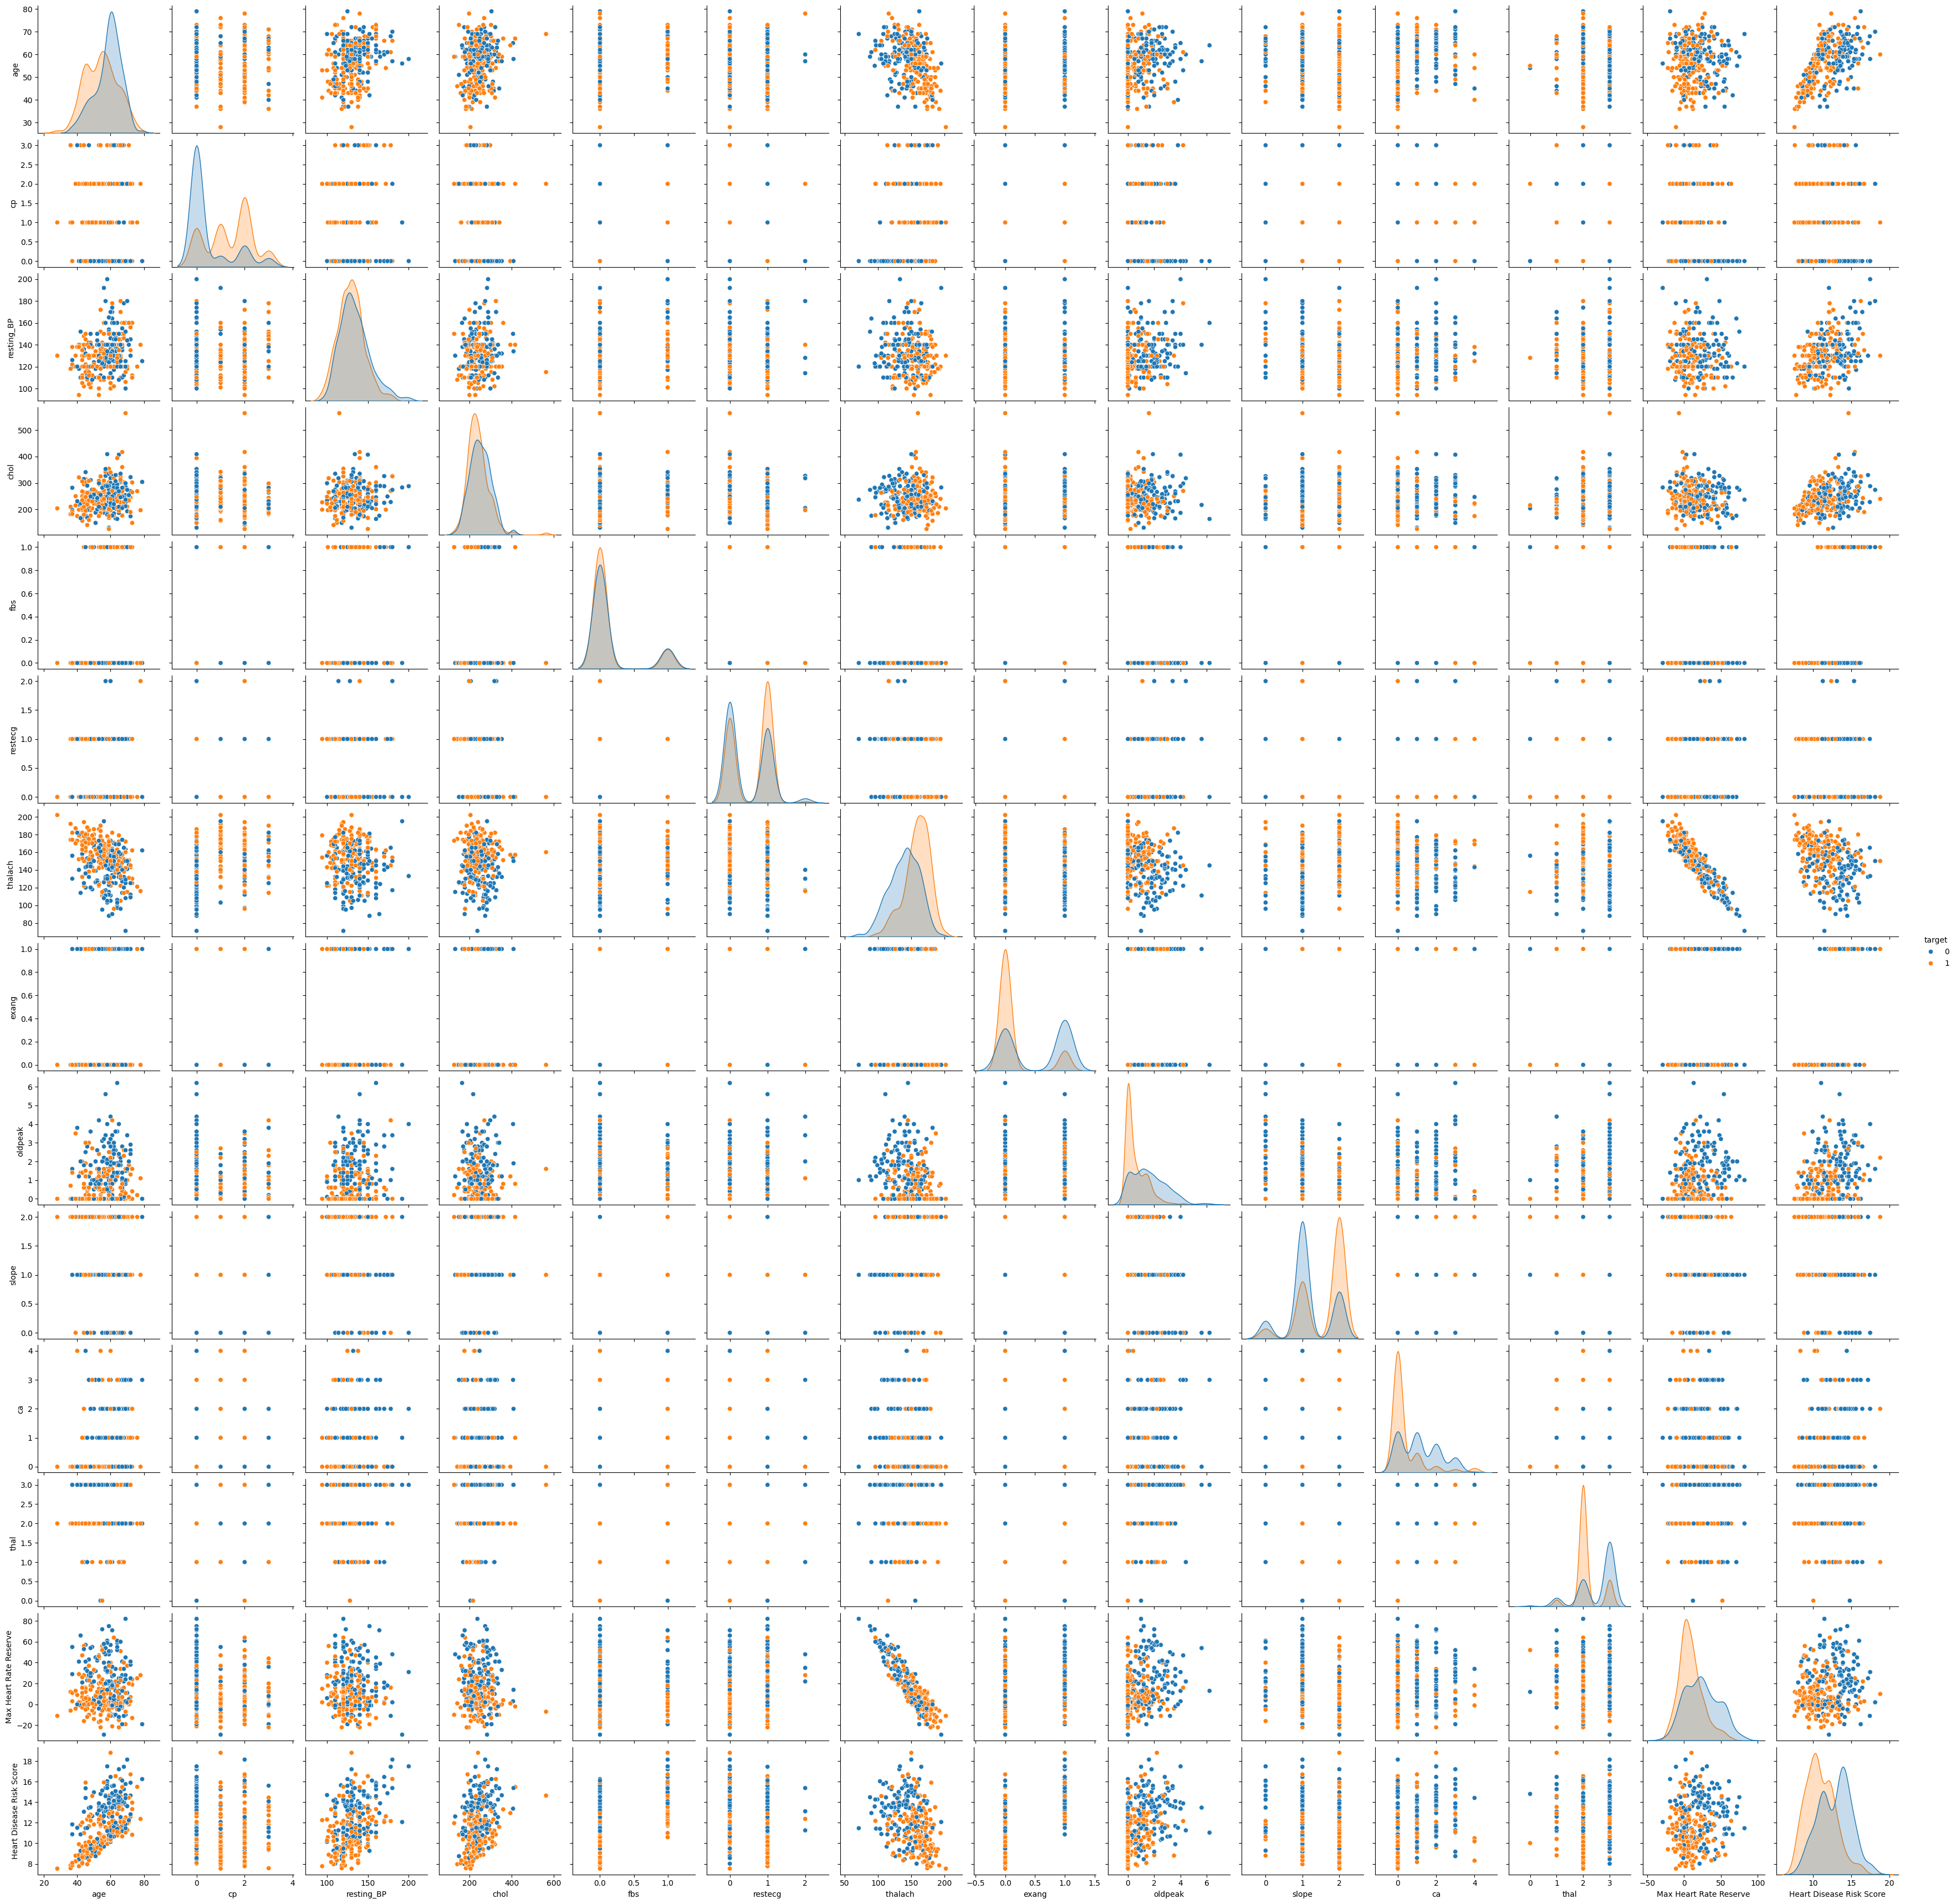

In [ ]:
sns.pairplot(heart, hue="target", diag_kind="kde")
plt.show()

## Data Preprocession

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
heart['sex'] = LabelEncoder().fit_transform(heart['sex'])

In [ ]:
X = heart.drop(columns=['target'])
y = heart['target']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
heart.head()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,1,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,1,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,1,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,0,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,1,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (828, 15)
X_test shape: (207, 15)
y_train shape: (828,)
y_test shape: (207,)


## Models Building


### 1. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy*100}")

Decision Tree Accuracy: 98.55072463768117


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       1.00      0.98      0.99       124

    accuracy                           0.99       207
   macro avg       0.98      0.99      0.99       207
weighted avg       0.99      0.99      0.99       207



### 2. Bagging (Bootstrap Aggregating)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy*100}")

Bagging Classifier Accuracy: 97.10144927536231


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        83
           1       1.00      0.95      0.98       124

    accuracy                           0.97       207
   macro avg       0.97      0.98      0.97       207
weighted avg       0.97      0.97      0.97       207



### 3. K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy*100}')

Accuracy: 96.1352657004831


In [ ]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print("classification_report for KNN:")
print(classification_report(y_test, y_pred))

classification_report for KNN:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        83
           1       0.98      0.95      0.97       124

    accuracy                           0.96       207
   macro avg       0.96      0.96      0.96       207
weighted avg       0.96      0.96      0.96       207



### 4. Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f"Accuracy: {logistic.score(X_test, y_test)*100}")

Accuracy: 86.47342995169082


In [ ]:
y_pred_lr = logistic.predict(X_test)
print(classification_report(y_test, y_pred_lr, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82        83
           1       0.87      0.91      0.89       124

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



### 5. Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_train, y_train)
y_pred = extra_trees.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Extra Trees Accuracy: {accuracy*100}")

Extra Trees Accuracy: 100.0


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



### 6. Support Vector Machine (SVM) - Linear - RBF - Poly


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Classifier Accuracy: {accuracy*100}")

SVC Classifier Accuracy: 91.78743961352657


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.93      0.93      0.93       124

    accuracy                           0.92       207
   macro avg       0.91      0.92      0.91       207
weighted avg       0.92      0.92      0.92       207



#### 1. Linear Kernel

In [ ]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [ ]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"SVM (Linear Kernel) Accuracy: {accuracy_linear*100}")

SVM (Linear Kernel) Accuracy: 85.5072463768116


In [ ]:
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear, zero_division=0))

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        83
           1       0.85      0.92      0.88       124

    accuracy                           0.86       207
   macro avg       0.86      0.84      0.85       207
weighted avg       0.86      0.86      0.85       207



#### 2. RBF kernel

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [ ]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"SVM (RBF Kernel) Accuracy: {accuracy_rbf*100}")

SVM (RBF Kernel) Accuracy: 91.78743961352657


In [ ]:
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf, zero_division=0))

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.93      0.93      0.93       124

    accuracy                           0.92       207
   macro avg       0.91      0.92      0.91       207
weighted avg       0.92      0.92      0.92       207



#### 3. Poly Kernel

In [ ]:
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

In [ ]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"SVM (Polynomial Kernel) Accuracy: {accuracy_poly*100}")

SVM (Polynomial Kernel) Accuracy: 94.68599033816425


In [ ]:
print("Classification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly, zero_division=0))

Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.94      0.97      0.96       124

    accuracy                           0.95       207
   macro avg       0.95      0.94      0.94       207
weighted avg       0.95      0.95      0.95       207



### 7. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 100.0


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



## Predicition

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

def predict_failure_risk(input_features):

    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    if len(input_features) != 15:
        raise ValueError("Input features must contain exactly 15 elements.")
    input_features = np.array(input_features).reshape(1, -1)

    prediction = model.predict(input_features)
    return int(prediction[0])

if __name__ == "__main__":
    print("Please enter the following features:")
    feature_names = [
        "Sex (male=0, female=1)", "Age", "Chest Pain Type", "Resting Blood Pressure", "Cholesterol",
        "Fasting Blood Sugar (>120 mg/dL, 1: True, 0: False)", "Resting ECG Results (0/1/2)",
        "Maximum Heart Rate Achieved", "Exercise Induced Angina (1: Yes, 0: No)",
        "ST Depression", "Slope of Peak Exercise ST Segment (0/1/2)",
        "Number of Major Vessels Colored (0-3)", "Thalassemia (1: Normal, 2: Fixed Defect, 3: Reversible Defect)",
        "Max Heart Rate Reserve", "Heart Disease Risk Score"
    ]

    user_input = []
    for feature in feature_names:
        value = input(f"Enter {feature}: ")
        try:
            user_input.append(float(value) if '.' in value else int(value))
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numeric value.")
            exit()

    try:
        result = predict_failure_risk(user_input)
        print("Predicted Risk:", "Heart Disease Present (1)" if result == 1 else "No Heart Disease (0)")
    except ValueError as e:
        print("Error:", e)

Please enter the following features:
Enter Sex (male=0, female=1): 0
Enter Age: 60
Enter Chest Pain Type: 2
Enter Resting Blood Pressure: 135
Enter Cholesterol: 220
Enter Fasting Blood Sugar (>120 mg/dL, 1: True, 0: False): 0
Enter Resting ECG Results (0/1/2): 1
Enter Maximum Heart Rate Achieved: 145
Enter Exercise Induced Angina (1: Yes, 0: No): 0
Enter ST Depression: 1.5
Enter Slope of Peak Exercise ST Segment (0/1/2): 1
Enter Number of Major Vessels Colored (0-3): 1
Enter Thalassemia (1: Normal, 2: Fixed Defect, 3: Reversible Defect): 1
Enter Max Heart Rate Reserve: 15
Enter Heart Disease Risk Score: 65
Predicted Risk: No Heart Disease (0)
